In [25]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import TimeDistributed
from tensorflow.keras.layers import Lambda,Reshape
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import ConvLSTM2D
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l1,l2,l1_l2
from tensorflow.keras.models import Sequential  #用來啟動 NN
from tensorflow.keras.layers import Conv2D  # Convolution Operation
from tensorflow.keras.layers import MaxPooling2D # Pooling
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense # Fully Connected Networks
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import BatchNormalization
import tensorflow.keras as keras  
import numpy as np
import pandas as pd
import os
import random
import re
import time
from random import shuffle
import itertools
import seaborn as sns;
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
from PIL import Image
import pathlib
from astropy.visualization import astropy_mpl_style

In [4]:
model=load_model('D:/farm_data/model/Restnet_V2_SE_RGB_500(class 14).h5')

In [28]:
img_valid = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,)
Valid_path = 'D:/farm_data/Valid_RGB_500/'
images_valid = img_valid.flow_from_directory(Valid_path,target_size=(500,500),color_mode='rgb' ,
                      batch_size=16060)
Input,Output=images_valid.next()
Input=np.array(Input)
output=np.array(Output)

Found 16060 images belonging to 14 classes.


In [13]:
ans=[]
for i in range(0,int(16060/20)):
    predict=model.predict(Input[0+i*20:20+i*20],4)
    classes=np.argmax(predict,axis=1)
    for j in classes:
        ans.append(j)
    print('Train: %d / %d '%(i,803),end='\r')

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    astropy_mpl_style['axes.grid'] = False
    plt.style.use(astropy_mpl_style)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.figure(figsize=(61,61))
    plt.tight_layout()

In [16]:
label=[]
for i in Output:
    for j in range(14):
        if i[j]==1:
            label.append(j)
            break

Confusion matrix, without normalization
[[ 807    0    0    0    0    0    1    0    0    0    0    0    0    0]
 [   1 2521    1    1    1    6    3   13    0    1   10    7    2    1]
 [   0    0  389    0    0    0    0    2    0    0    0    0    0    0]
 [   4    0    0 1915    0    3    3    5    0    1    0    7    6    1]
 [   1    0    0    1  387    0    0    0    0    0    0    0    0    1]
 [   0    0    1   10    0 1516    0    3    3    0    4    8    6    3]
 [   0    0    0    0    0    0  926    1    0    0    0    0    0    1]
 [   0    3    2    1    0    1    1 2055    0    1    2   25    0    0]
 [   1    1    0    0    0    1    0    0 1596    0    0    1    0    0]
 [   1    2    0    0    1    0    0    0    0  327    0    5    0    0]
 [   0    2    0    0    0    1    0    0    1    0 1571    0    0    0]
 [   0    3    6    2    0    2    5   25    0    2    3 1083    1    0]
 [   0    0    0    3    0    1    0    0    1    0    0    0  428    1]
 [   1    0

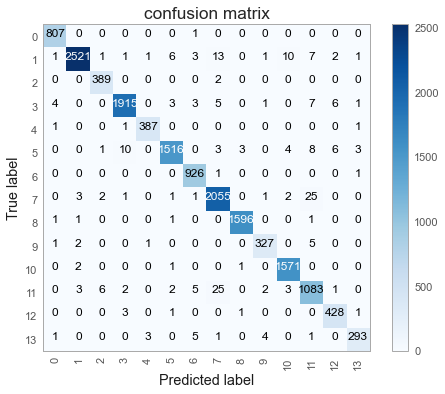

<Figure size 4392x4392 with 0 Axes>

In [18]:
#畫混淆矩陣
sns.set() 
C2= confusion_matrix(np.array(ans), label, labels=[0,1,2,3,4,5,6,7,8,9,10,11,12,13])
plot_confusion_matrix(C2, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13],normalize=False,
                    title="confusion matrix")

In [19]:
#F1-score
for i in range(14):
    FN=0
    TP=C2[i][i]
    FP=0
    TN=0
    for j in range(14):
        if j==i:
            continue
        FN=FN+C2[i][j]
    for j in range(14):
        if j==i:
            continue
        FP=FP+C2[j][i]
    TN=len(ans)-FP-TP
    precision=(TP)/(TP+FP)
    recall=(TP)/(TP+FN)
    print(i,'F1-score:',(2*((precision*recall)/(precision+recall))))

0 F1-score: 0.9938423645320198
1 F1-score: 0.9886274509803921
2 F1-score: 0.9848101265822785
3 F1-score: 0.9876224858174316
4 F1-score: 0.9897698209718669
5 F1-score: 0.9828200972447325
6 F1-score: 0.9893162393162394
7 F1-score: 0.9795042897998094
8 F1-score: 0.9971883786316776
9 F1-score: 0.9732142857142857
10 F1-score: 0.9927330173775671
11 F1-score: 0.9546055531070955
12 F1-score: 0.9760547320410491
13 F1-score: 0.9622331691297208
